Sample how to use similarity in the cluster to calculate the weighted average price for a particular data point.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from util_distances_in_clusters import plot_kmeans, annotate_data_points2

In [2]:
# Generate data
np.random.seed(0)
data, y_true = make_blobs(n_samples=5, centers=1, cluster_std=0.80, random_state=0)
data = data[:, ::-1]  # flip axes for better plotting
print(data)

[[5.46720613 1.09150494]
 [4.18270156 1.73634081]
 [4.63226613 0.893695  ]
 [3.52196502 2.47031647]
 [6.09650189 1.75926047]]


In [3]:
# Choose a data point
ix = 3
x = data[ix]
colors = np.zeros(data.shape[0])
colors[ix] = 1

In [4]:
# Calculate distances to our X point
distances = euclidean_distances(data, [x])
distances = [d[0] for d in distances]

In [5]:
# Set prices and caclulate sililarity
distances_max = np.max(distances)
similarity_weights = [1. - d / distances_max for d in distances]
prices = [120., 80., 80., 60., 50.]
print(f'prices: {prices}')
print(f'similarity_weights: {similarity_weights}')

prices: [120.0, 80.0, 80.0, 60.0, 50.0]
similarity_weights: [0.10729750650092984, 0.6302519788079537, 0.27802458002068997, 1.0, 0.0]


In [6]:
# Calculate weighted_avg_price
weighted_avg_price = np.average(prices, weights=similarity_weights)
print(f'price was {prices[ix]} and now it is as weighted_avg_price={round(weighted_avg_price,1)}')
prices[3] = weighted_avg_price

price was 60.0 and now it is as weighted_avg_price=72.2


you see the yellow data point was slightly underpriced!!!


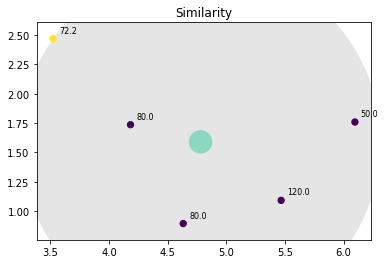

In [7]:
# Show data
kmeans = KMeans(n_clusters=1, random_state=0)
ax = plot_kmeans(plt, kmeans, data, title='Similarity', colors=colors)
annotate_data_points2(plt, data, prices, ax=ax)
print(f'you see the yellow data point was slightly underpriced!!!')